Installing library

In [ ]:
# For installing necessary libraries
!pip install -q -U google-generativeai grpcio grpcio-tools

Importing Gemini

In [1]:
# Import the Google Generative AI library
import google.generativeai as genai

# Initialize the GenerativeModel with 'gemini-pro' for chat and code
text_model = genai.GenerativeModel('gemini-pro')

# Initialize the GenerativeModel with 'gemini-pro-vision' for graphs
image_model = genai.GenerativeModel('gemini-pro-vision')

# Configure the library with your API key
genai.configure(api_key="Your-API-Key-Here")

Importing Copilot libraries

In [2]:
# Regular expression for pattern matching
import re

# IPython for working with IPython environment
import IPython

# OS for interacting with the operating system
import os

# JSON for working with JSON data
import json

# Base64 for encoding and decoding base64 data
import base64

# Image class from IPython.display for displaying images
from IPython.display import Image

# register_line_magic for registering custom magic commands
from IPython.core.magic import register_line_magic

Chat feature

In [3]:
# Registering a Jupyter Notebook magic command named 'chat'
@register_line_magic
def chat(contents):
    # Generating a response using the 'generate_content' method of the 'text_model' object
    # The method takes a formatted string containing the provided 'contents'
    response = text_model.generate_content(f'''
                                    Answer the question in a short quick readable paragraph, dont provide answer in any format or code
                                    {contents}
                                    ''').text

    # Printing the generated response to the output
    print(response)

In [4]:
%chat What are some useful libraries for coding neural networks in Python

Some useful libraries for coding neural networks in Python include TensorFlow, PyTorch, Keras, and Theano. TensorFlow is a popular library developed by Google, known for its flexibility and scalability. PyTorch is another widely used library, favored for its dynamic computation graphs. Keras is a high-level API that simplifies the development of neural networks by providing a user-friendly interface. Theano is a library that supports efficient numerical computation, often used for research purposes.


Chat with code feature

In [5]:
# Define a function named 'chatn' that takes 'contents' as a parameter
@register_line_magic
def chatn(contents):
    try:
        # Use regular expression to find all occurrences of '--in' followed by digits in 'contents'
        numbers = [int(match.group().replace('--in', '')) for match in re.finditer(r'--in\d+', contents)]

        # Remove the found pattern '--in\d+' from 'contents'
        contents_filter = re.sub(r'--in\d+', '', contents)

        # Check if there are any references (numbers) found
        if numbers:
            # Retrieve the current cell contents for all references using the IPython 'In' variable
            current_cell_contents = [In[number] for number in numbers]

            # Combine the contents into a single string with line breaks
            combined_content = '\n'.join(current_cell_contents)

            # Execute the text_model to generate response
            response = text_model.generate_content(f'''
                                            {combined_content}
                                            Answer the question in a short readable paragraph, don't provide the answer in any format or code
                                            {contents_filter}
                                            ''').text

            # Print the generated response
            print(response)

        else:
            # Print an error message if no references are found
            print('Please provide a correct codeblock reference.')

    except Exception as e:
        # Print an error message if an exception occurs
        print('Please provide a correct codeblock reference.')

In [6]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

In [7]:
x+y

[1, 2, 3, 4, 5, 2, 4, 6, 8, 10]

In [8]:
# Running Chat with Code Feature
%chatn --in6 --in7 I sum element wise but it is not working

The '+' operator is used for concatenation of lists in Python, not element-wise addition. To perform element-wise addition, you can use the 'zip()' function to iterate over the lists simultaneously and add the corresponding elements together. The resulting list will contain the element-wise sums of the two input lists.


Generate code feature

In [9]:
# Register a custom line magic command
@register_line_magic
def code(contents):

    # Get the IPython shell instance
    from IPython.core.getipython import get_ipython
    shell = get_ipython()

    # Generate code content using a text model
    response = text_model.generate_content(f'''
                                    write a python code that and dont answer anything else
                                    {contents}
                                    ''').text

    # Remove ``` and python from the response
    response = response.replace('```', '')

    # Clean up the response
    response = response.replace('python', '').strip('\n').rstrip('\n').replace('```python', '')

    # Prepare payload for setting the next input
    payload = dict(
        source='set_next_input',
        text=response,
        replace=False,
    )

    # Write the payload to the IPython shell
    shell.payload_manager.write_payload(payload, single=False)

In [10]:
# Running Generate Code Feature
%code load my data.csv and take random sample of 100 rows

In [ ]:
import pandas as pd

# Load the data.csv file
data = pd.read_csv('data.csv')

# Take a random sample of 100 rows
sample = data.sample(n=100)

# Print the sample
print(sample)

Relational Code Feature

In [11]:
# Define a function named 'coden' that takes 'contents' as a parameter
@register_line_magic
def coden(contents):
    try:

        # Get the IPython shell instance
        from IPython.core.getipython import get_ipython
        shell = get_ipython()

        # Use regular expression to find all occurrences of '--in' followed by digits in 'contents'
        numbers = [int(match.group().replace('--in', '')) for match in re.finditer(r'--in\d+', contents)]

        # Remove the found pattern '--in\d+' from 'contents'
        contents_filter = re.sub(r'--in\d+', '', contents)

        # Check if there are any references (numbers) found
        if numbers:
            # Retrieve the current cell contents for all references using the IPython 'In' variable
            current_cell_contents = [In[number] for number in numbers]

            # Combine the contents into a single string with line breaks
            combined_content = '\n'.join(current_cell_contents)

            # Execute the text_model to generate code
            response = text_model.generate_content(f'''{combined_content}
                                                  {contents_filter}
                                                  please write Python code and don't answer anything else, dont provide output of the code
                                                  ''').text
            # Remove ``` and python from the response
            response = response.replace('```', '')

            # Clean up the response
            response = response.replace('python', '').strip('\n').rstrip('\n').replace('```python', '')

            # Prepare payload for setting the next input
            payload = dict(
                source='set_next_input',
                text=response,
                replace=False,
            )

            # Write the payload to the IPython shell
            shell.payload_manager.write_payload(payload, single=False)

        else:
            # Print an error message if no references are found
            print('Please provide a correct codeblock reference.')

    except Exception as e:
        # Print an error message if an exception occurs
        print('Please provide a correct codeblock reference.')

In [12]:
x = [1, 2, 3, 4, 5]

In [13]:
y = 3

In [14]:
# Running Relational Code Feature
%coden --in12 --in13 multiply y with each x item

In [ ]:
result = [i * y for i in x]

Chat with graph Feature

In [15]:
# Try to get the current notebook filename using IPython
try:
    file_name = IPython.extract_module_locals()[1]['__vsc_ipynb_file__']

    # Extract the base name (file name) from the file path
    file_name = os.path.basename(file_name)

except:
    # If an exception occurs, print a message indicating no file
    file_name = None

# Register a custom magic command for the Jupyter notebook
@register_line_magic
def graph(contents):
    # Search for the pattern --in<number>
    pattern = re.compile(r'--in\d+')

    # Find the first occurrence of the pattern in the contents
    match = pattern.search(contents)

    # Remove the pattern from the contents
    contents_filter = pattern.sub('', contents)

    # Define a new pattern for --filename=<word>
    pattern_f = re.compile(r'--filename=\w+')

    # Find the first occurrence of the new pattern in the contents
    match_f = pattern_f.search(contents)

    # Remove the new pattern from the filtered contents
    contents_filter = pattern_f.sub('', contents_filter)

    # If the --in<number> pattern is found
    if match:
        # Get the global variable file_name
        global file_name

        # Check if file_name is available from the IPython magic command
        if file_name:
            notebookName = file_name
            with open(notebookName, "r") as f:
                # Load the notebook JSON data
                notebook_json = json.load(f)
        elif match_f:
            # Extract the filename from the --filename=<word> pattern
            match_c = match_f.group().replace('--filename=', '')
            notebookName = match_c + '.ipynb'
            with open(notebookName, "r") as f:
                # Load the notebook JSON data
                notebook_json = json.load(f)
        else:
            # If neither file_name nor --filename=<word> is provided, print an error message
            return 'Please provide a correct file path using --filename=<filename>.ipynb, e.g., --filename=mycode.ipynb'

        # Extract the number from the --in<number> pattern
        number = int(match.group().replace('--in', ''))

        # Find the cell with the specified execution_count in the notebook JSON data
        element = next(cell for cell in notebook_json['cells'] if 'execution_count' in cell and cell['execution_count'] == number)

        # Extract image data from the cell's output
        image_data = element['outputs'][0]['data']['image/png']

        # Decode base64 image data
        image_base64 = base64.b64decode(image_data)

        # Save the image in the local directory as img_code.jpg
        with open('img_code.jpg', 'wb') as f:
            f.write(image_base64)

        # Load the image using the Image() function
        image = Image(filename='img_code.jpg')

        # extract information using image model
        response = image_model.generate_content([contents_filter, image])
        print(response.text)
    else:
        # If --in<number> pattern is not found, print an error message
        print('Please provide a correct code block reference.')

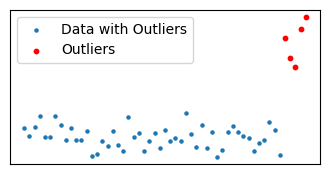

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Set a seed for reproducibility
np.random.seed(42)

# Generate random data with outliers
data = np.random.normal(loc=5, scale=2, size=50)
outliers = np.random.normal(loc=20, scale=5, size=5)
data_with_outliers = np.concatenate((data, outliers))

# Create an index for each data point
indices = np.arange(len(data_with_outliers))

# Increase the width of the graph
plt.figure(figsize=(4, 2))

# Plot the random graph with outliers
plt.scatter(indices, data_with_outliers, label='Data with Outliers', s=5)  # Increase the size of the points

# Highlight the outliers with a different color
plt.scatter(indices[-5:], outliers, color='red', label='Outliers', s=10)  # Increase the size of the points

# Remove labels on x-axis and y-axis
plt.xticks([])
plt.yticks([])

# Remove the title of the graph
plt.title('')

# Increase the size of the legends
plt.legend(prop={'size': 10})

plt.show()

In [19]:
# Running Chat with Image Feature
%graph --in16 how many outliers are there

 There are five outliers.


Chat with Files Feature

In [20]:
# Register a custom magic command for IPython
@register_line_magic
def chatf(contents):
    try:
        # Parse the folder name from the provided argument
        folder_match = re.search(r'--folder_name=(\S+)', contents)
        if not folder_match:
            # Print an error message if folder name is not provided in the correct format
            print("Please provide a valid folder name using the format '--folder_name=<folder_name>'.")
            return

        # Extract the folder name from the regex match
        folder_name = folder_match.group(1)

        # Get a list of Python files in the specified folder
        python_files = [file for file in os.listdir(folder_name) if file.endswith('.py')]

        # Check if any Python files were found
        if not python_files:
            print(f"No Python files found in the folder '{folder_name}'.")
            return

        # Initialize an empty string to store combined content
        combined_content = ""

        # Iterate through each Python file in the folder
        for file_name in python_files:
            with open(os.path.join(folder_name, file_name), 'r') as file:
                # Read the content of the file
                file_content = file.read()

                # Format the combined content with file name and its code
                combined_content += f"\nfile: {file_name}\n{file_content}\n{'_'*15}\n"

        # Remove the pattern of folder from the input contents
        contents_filter = re.sub(r'--folder_name=\S+', '', contents)

        # Generate content using a model and display the response
        response = text_model.generate_content(f'''
                                        {combined_content}
                                        Answer the question in a short readable paragraph, don't provide the answer in any format or code
                                        {contents_filter}
                                        ''').text
        print(response)

    except Exception as e:
        # Print an error message if an exception occurs
        print(f'An error occurred: {str(e)}')

In [21]:
# Running chat with files Feature
%chatf --folder_name=myfolder How to clean and format data

To clean and format data, you can use the `data_preprocessing()` function from `codefile_A.py`. This function removes all spaces from the input data, making it easier to work with. Once the data is cleaned, you can use the `adding_numbers()` function from `codefile_B.py` to add two numbers together.


Compiling the Features and using it

In [ ]:
# Importing all features of your copilot
from my_copilot import *

# using generate code feature
%code load my data.csv file using pandas